In [1]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
import uproot
import math

In [2]:
%matplotlib inline

In [3]:
skimsigfile = uproot.open("/Users/User/Downloads/FASERnu1-skim-1000.root") # Open signal ROOT file
sigxarray = skimsigfile["ntuple"]["x"].array()
sigyarray = skimsigfile["ntuple"]["y"].array()   ###############################################
sigzarray = skimsigfile["ntuple"]["z"].array()   # This codeblock extracts low-level variables #
sigpxarray = skimsigfile["ntuple"]["px"].array() # (e.g. x, y, z, px, py, pz)                  #
sigpyarray = skimsigfile["ntuple"]["py"].array() ###############################################
sigpzarray = skimsigfile["ntuple"]["pz"].array()

skimbgfile = uproot.open("/Users/User/Downloads/FASERnu1-skim-51.root") # Open BG ROOT file
bgxarray = skimbgfile["ntuple"]["x"].array()
bgyarray = skimbgfile["ntuple"]["y"].array()   ###############################################
bgzarray = skimbgfile["ntuple"]["z"].array()   # This codeblock extracts low-level variables #
bgpxarray = skimbgfile["ntuple"]["px"].array() # (e.g. x, y, z, px, py, pz)                  #
bgpyarray = skimbgfile["ntuple"]["py"].array() ###############################################
bgpzarray = skimbgfile["ntuple"]["pz"].array()
lensig = len(sigxarray) # Get number of signal hits
lenbg = len(bgxarray) # Get number of background hits
print(lensig,lenbg)

224696 5779199


In [96]:
sigalpha = np.zeros(lensig)      # angle of hit position WRT beam axis
sigdeltatheta = np.zeros(lensig) # angle of hit momentum WRT beam axis
sigthetax = np.zeros(lensig)     # angle in xz plane
sigthetay = np.zeros(lensig)     # angle in yz plane
sigip = np.zeros(lensig)         # Impact parameter
sigenergy = np.zeros(lensig)     # Basetrack energy
count = 0
for i in range(0,lensig):
    x = sigxarray[i]
    y = sigyarray[i]
    z = sigzarray[i] + 696.5 # First absorber layer is at z = -696.5
    if math.atan(math.sqrt(x**2+y**2)/z)>0.1:
        continue
    px = sigpxarray[i]
    py = sigpyarray[i]
    pz = sigpzarray[i]
    if math.sqrt((x-z*px/pz)**2+(y-z*py/pz)**2)>50:
        continue
    sigalpha[count] = math.atan(math.sqrt(x**2+y**2)/z)
    sigdeltatheta[count] = math.atan(math.sqrt(px**2+py**2)/pz)
    sigthetax[count] = math.atan(px/pz)
    sigthetay[count] = math.atan(py/pz)
    sigip[count] = math.sqrt((x-z*px/pz)**2+(y-z*py/pz)**2)
    sigenergy[count] = math.sqrt(px**2+py**2+pz**2)
    count += 1
sigalpha = np.trim_zeros(sigalpha)
sigdeltatheta = np.trim_zeros(sigdeltatheta)
sigthetax = np.trim_zeros(sigthetax)
sigthetay = np.trim_zeros(sigthetay)
sigip = np.trim_zeros(sigip)
sigenergy = np.trim_zeros(sigenergy)
print(count)

121545


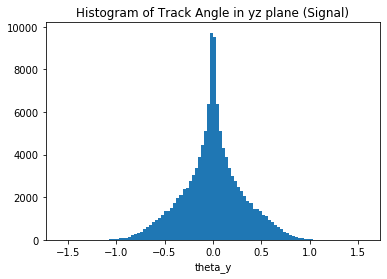

In [101]:
_ = plt.hist(sigthetay, range=[-1.57,1.57],bins=100)  # arguments are passed to np.histogram
plt.title("Histogram of Track Angle in yz plane (Signal)")
plt.xlabel("theta_y")
plt.show()

In [89]:
bgalpha = np.zeros(lenbg)      # angle of hit position WRT beam axis
bgdeltatheta = np.zeros(lenbg) # angle of hit momentum WRT beam axis
bgthetax = np.zeros(lenbg)     # angle in xz plane
bgthetay = np.zeros(lenbg)     # angle in yz plane
bgip = np.zeros(lenbg)         # Impact parameter
bgenergy = np.zeros(lenbg)     # Basetrack energy
count = 0
for i in range(0,lenbg):
    x = bgxarray[i]
    y = bgyarray[i]
    z = bgzarray[i] + 696.5 # First absorber layer is at z = -696.5
    if math.atan(math.sqrt(x**2+y**2)/z)>0.1:
        continue
    px = bgpxarray[i]
    py = bgpyarray[i]
    pz = bgpzarray[i]
    if math.sqrt((x-z*px/pz)**2+(y-z*py/pz)**2)>50:
        continue
    bgalpha[count] = math.atan(math.sqrt(x**2+y**2)/z)
    bgdeltatheta[count] = math.atan(math.sqrt(px**2+py**2)/pz)
    bgthetax[count] = math.atan(px/pz)
    bgthetay[count] = math.atan(py/pz)
    bgip[count] = math.sqrt((x-z*px/pz)**2+(y-z*py/pz)**2)
    bgenergy[count] = math.sqrt(px**2+py**2+pz**2)
    count += 1
    if i%100==0:
        print(i,count)
print(lenbg,count)
bgalpha = np.trim_zeros(bgalpha)
bgdeltatheta = np.trim_zeros(bgdeltatheta)
bgthetax = np.trim_zeros(bgthetax)
bgthetay = np.trim_zeros(bgthetay)
bgip = np.trim_zeros(bgip)
bgenergy = np.trim_zeros(bgenergy)

68100 114
219100 287
296300 292
585600 380
822400 478
969400 507
980500 615
981000 713
1019100 947
1019400 1069
1087900 1207
1088000 1268
1088100 1325
1092000 1538
1178600 1618
1178700 1659
1179000 1755
1179100 1785
1179200 1798
1487000 1939
1487400 2074
1487500 2118
1487700 2211
1487800 2269
1586200 2495
1968400 2629
2107100 2684
2107500 2724
2127300 2863
2137400 2995
2142400 3010
2142600 3083
2195100 3142
2335600 3405
2335700 3463
2336100 3642
2336200 3696
2336300 3751
2336600 3896
2336700 3939
2336900 4040
2347300 4085
2676100 4309
2818100 4364
2822300 4382
2877600 4411
2917300 4651
2917500 4724
2917600 4763
2917800 4830
3410000 5286
3411400 5423
3412000 5452
3522600 5516
3556700 5840
3585000 6179
3590300 6224
3947500 6539
3959400 6591
4184600 6653
4739500 7127
5143400 7293
5437200 7412
5450800 7429
5540300 7603
5570200 7738
5766000 7773
5779199 7774


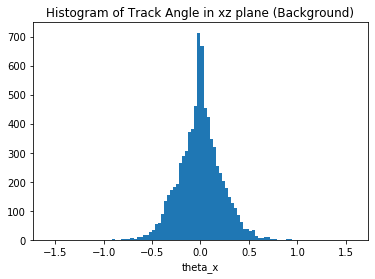

In [102]:
_ = plt.hist(bgthetax, range=[-1.57,1.57],bins=100)  # arguments are passed to np.histogram
plt.title("Histogram of Track Angle in xz plane (Background)")
plt.xlabel("theta_x")
plt.show()

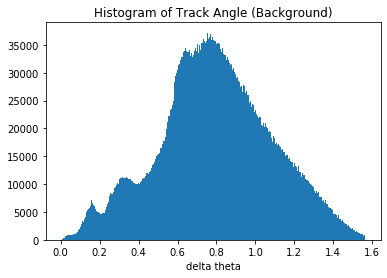

In [65]:
_ = plt.hist(bgalpha, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Track Angle (Background)")
plt.xlabel("delta theta")
plt.show()

In [5]:
def buildEs(c):
    #build basic variable
    c["p"]=np.sqrt(c["px"]**2+c["py"]**2+c["pz"]**2)
    c["pT"]=np.sqrt(c["px"]**2+c["py"]**2)
    c["r"]=np.sqrt(c["x"]**2+c["y"]**2+c["z"]**2)
    c["rho"]=np.sqrt(c["x"]**2+c["y"]**2)
buildEs(csig)
buildEs(cbkg)

In [6]:
# csig.to_hdf("sig10.h5","dataset")
# cbkg.to_hdf("bkg1000.h5","dataset")

In [16]:
def compare(vl=['x', 'y', 'z',"r","rho"],ylim=None,log=False):
    fig,axs=plt.subplots(1,2,figsize=(10,10))
    csig.boxplot(vl,ax=axs[0])
    cbkg.boxplot(vl,ax=axs[1])
    if ylim is not None:
        axs[0].set_ylim(ylim)
        axs[1].set_ylim(ylim)
    if log:
        axs[0].set_yscale("log")
        axs[1].set_yscale("log")

In [41]:
csig=csig[csig["z"]<-600]
cbkg=cbkg[cbkg["z"]<-600]

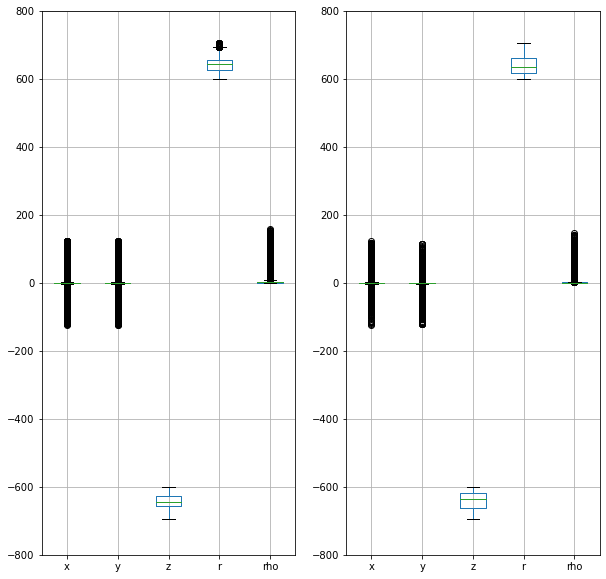

In [42]:
compare(ylim=[-800,800])

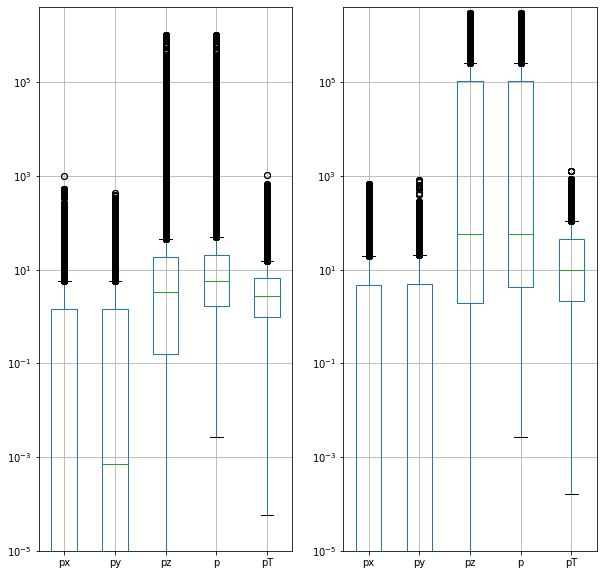

In [43]:
compare(['px','py','pz','p','pT'],ylim=[1e-5,4e6],log=True)

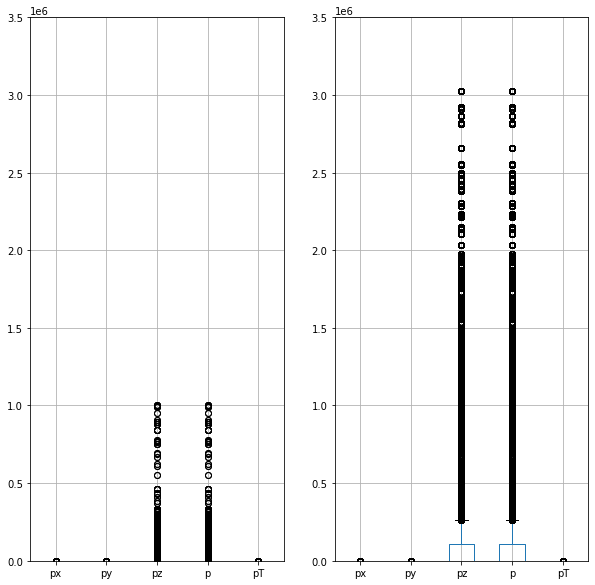

In [44]:
compare(['px','py','pz','p','pT'],ylim=[0,3.5e6])

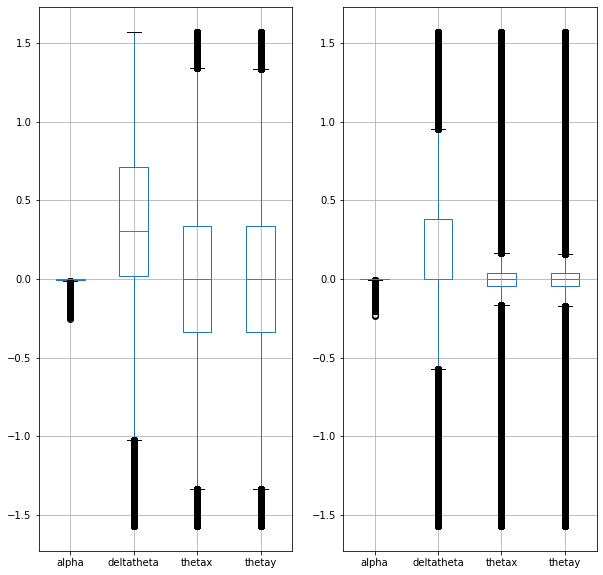

In [45]:
compare(['alpha', 'deltatheta','thetax', 'thetay'])

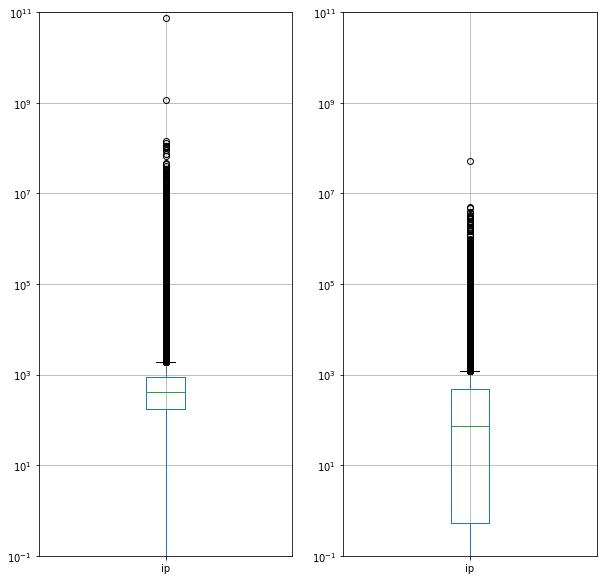

In [46]:
compare(['ip'],ylim=[0.1,1e11],log=True)

In [47]:
def maaPlot(d,d2,cs=None):
    cs=list(d.columns) if cs is None else cs
    s=len(cs)
    x=5
    y=round(s/5)+1
    print(x,y)
    fig,axs=plt.subplots(y,x,figsize=(4*x,4*y))
    for k,ax in zip(cs,axs.flat):
        xmin=np.min([d.min()[k],d2.min()[k]])
        xmax=np.max([d.max()[k],d2.max()[k]])
        d.hist(k,bins=100,ax=ax,range=[xmin,xmax],density=True)
        d2.hist(k,bins=100,ax=ax,range=[xmin,xmax],density=True)

5 4


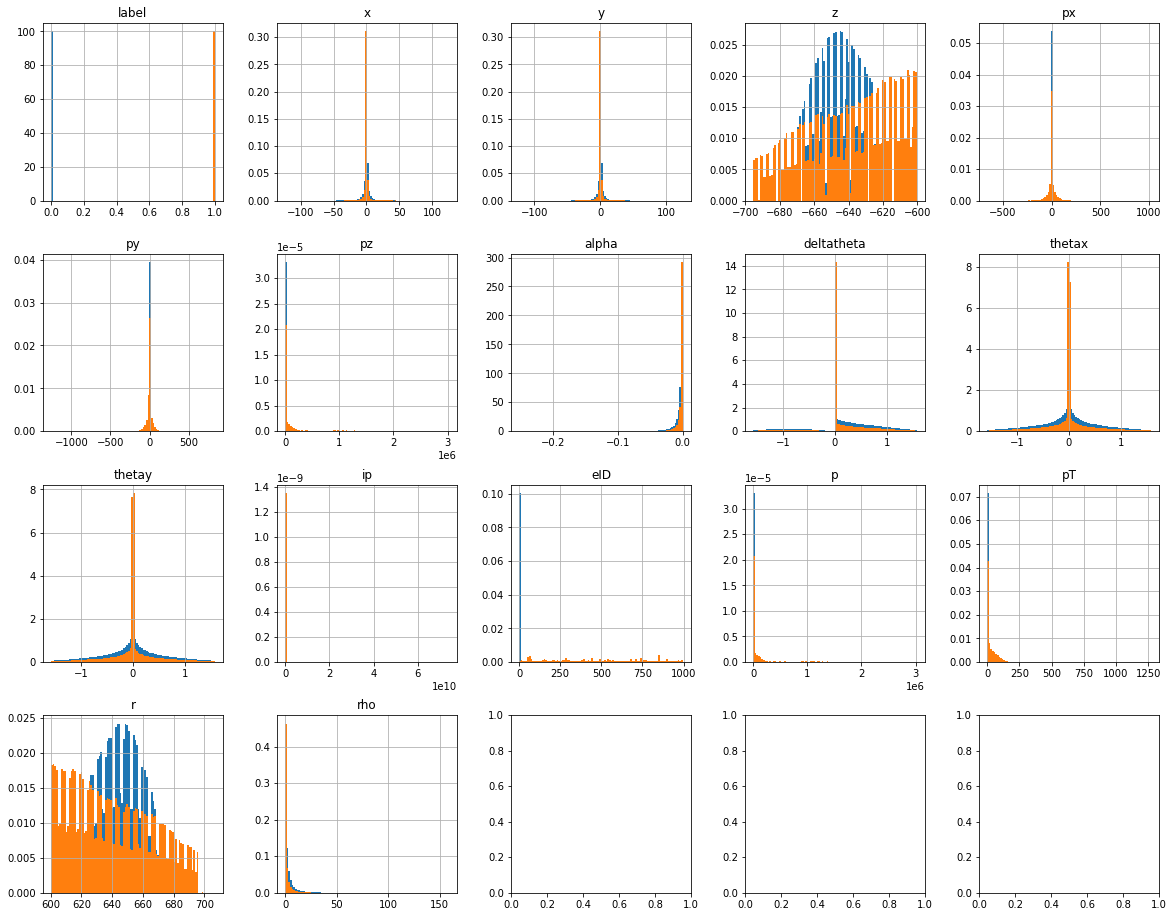

In [48]:
maaPlot(csig,cbkg)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,precision_score,roc_auc_score,plot_roc_curve

In [4]:
# csig=pd.read_hdf("sig10.h5")
# cbkg=pd.read_hdf("bkg1000.h5")

In [127]:
clf = DecisionTreeClassifier(random_state=0,max_depth=3,class_weight="balanced") #,max_depth=5,max_leaf_nodes=5
# features=['x', 'y', 'z', 'px', 'py', 'pz', 'alpha', 'deltatheta', 'thetax', 'thetay', 'ip', 'p', 'pT', 'r', 'rho']
# features=['x', 'y', 'z', 'px', 'py', 'pz', 'alpha', 'deltatheta', 'thetax', 'thetay', 'ip']
features=['z', 'pz', 'alpha']

In [128]:
print(len(csig),len(cbkg))
cmerge=csig.append(cbkg)
X=cmerge[features].values
y=cmerge["label"].values
print(len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

4269757 341276
4611033


In [129]:
%%time
clf=clf.fit(X_train,y_train)

CPU times: user 3.78 s, sys: 1.93 ms, total: 3.78 s
Wall time: 3.79 s


In [130]:
%%time
clf.score(X_test,y_test)

CPU times: user 150 ms, sys: 1.04 ms, total: 151 ms
Wall time: 148 ms


0.9034565992233847

In [131]:
from sklearn import tree
import graphviz
def plotTree(clf):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=["sig","bkg"],  
                         filled=True,  
                         special_characters=True,impurity=True,proportion=False,precision=6)  
    graph = graphviz.Source(dot_data)  
    return graph

In [132]:
%%capture cap
plotTree(clf)

In [133]:
with open("tree.svg","w") as f:
    f.write(cap.outputs[0].data['image/svg+xml'])

In [134]:
y_test_predict=clf.predict(X_test)
print(accuracy_score(y_test,y_test_predict))
print(precision_score(y_test,y_test_predict))
print(roc_auc_score(y_test,y_test_predict))

0.9034565992233847
0.39588143274633186
0.7527765945310158


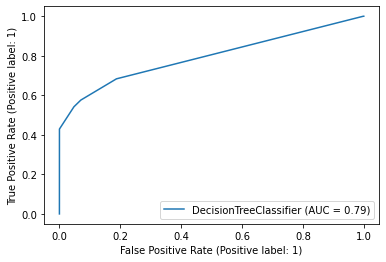

In [135]:
plot_roc_curve(clf,X_test,y_test)